### Comparing models

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
results_lr = pd.read_pickle('Data/results_pred_test.pkl')

In [3]:
results_dt_rf = pd.read_pickle('Data/results_dt_rf_pred_test.pkl')

In [4]:
results_dt_rf.head(2)

,Actual,DT_Pred,DT_Tuned_Pred,RF_Pred,RF_Tuned_Pred
Date_Time,,,,,
2017-04-06,118,111.777778,106.957746,108.561134,109.454551
2017-02-16,109,111.777778,106.957746,108.561134,109.454551


In [5]:
results_lr_no_events = pd.read_pickle('Data/results_LR_pred_test_no_events.pkl')

In [6]:
results_lr_no_events.head(1)

,Actual,LR_Pred_No_Events,Lasso_Pred_No_Events,Ridge_Pred_No_Events
Date_Time,,,,
2017-04-06,118,111.777778,110.630878,111.729084


In [7]:
results = pd.DataFrame(results_lr['LR_Pred'].sort_index())

In [8]:
results['LR_No_Events'] = results_lr_no_events['LR_Pred_No_Events'].sort_index()

In [9]:
results['DT'] = results_dt_rf['DT_Pred'].sort_index()

In [10]:
results['RF'] = results_dt_rf['RF_Pred'].sort_index()

In [11]:
results['Actual'] = results_dt_rf['Actual'].sort_index()

In [12]:
results.describe()

,LR_Pred,LR_No_Events,DT,RF,Actual
count,33.000000,33.000000,33.000000,33.000000,33.000000
mean,122.810491,124.523780,122.254347,124.134852,127.333333
std,37.200543,31.236146,38.671593,37.451924,48.370747
min,16.344828,101.250000,0.000000,29.720551,0.000000
25%,101.823529,101.823529,101.823529,104.112178,103.000000
50%,111.777778,111.777778,111.777778,108.561134,123.000000
75%,134.833333,134.833333,135.058824,136.176486,149.000000
max,243.400000,199.105263,231.500000,230.937778,292.000000


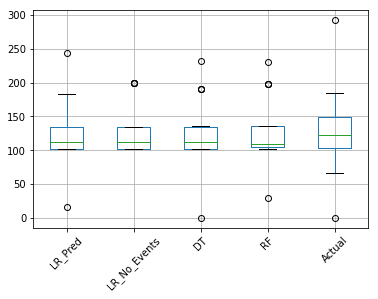

In [13]:
results.boxplot(rot=45)

### Results of all models are very similar around the mean, however, the models with local events and bank holidays are able to predict better for extreme day sales.

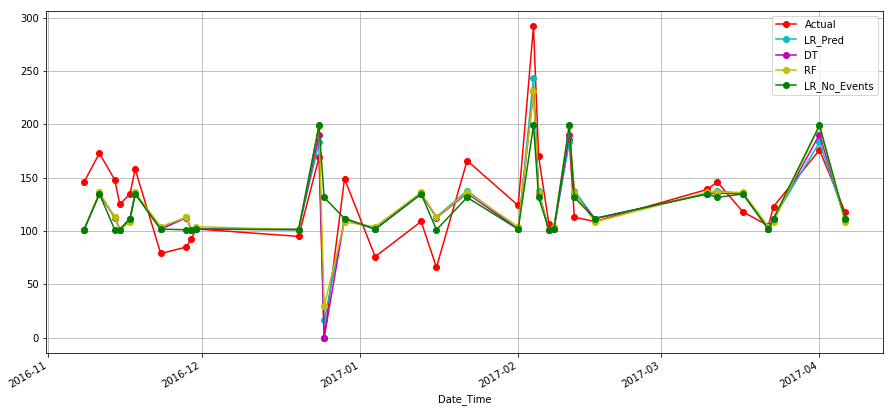

In [14]:
#tt['Actual', 'LR_Pred', 'RF_Pred'].plot(figsize=(15,7), style={'Actual': '-or', 'LR_Pred': '-ob', 'RF_Pred': '-oy'})
results[['Actual', 'LR_Pred', 'DT', 'RF','LR_No_Events']].plot(figsize=(15,7), style={'Actual': '-or', 'LR_Pred': '-oc', 'DT':'-om', 'RF':'-oy', 'LR_No_Events': '-og'}, grid=True)

### In conclusion
- Models without is_local_event and is_bank_holiday are not able to predict at all when those events happens
- All models predict well when sales are within the interquartile range
- All models underestimates  the sales when there are local events
- All models except decision  tree are not able to predict precisely for bank holiday.
- The models are not perfect but because its weakness are known, adjustment can be made to fix them.
- The best model to predict sales will be linear regression for its simplicity and interpretability.